In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.cosmology import Planck18
from astropy import units as u
from pdet import *
import os

plt.style.use("default")
plt.style.use("mainstyle.mplstyle")

/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_fig = True
image_path = "images"
dpi = 300

figures, figure_paths = [], []

In [3]:
# Labels strings
msun_lb = "\mathrm{M}_\odot"
Gpc_lb = "\mathrm{Gpc}"
yr_lb = "\mathrm{yr}"
pdet_lb = "p_\\text{det}"
VT_lb = "\left\langle VT\\right\\rangle"
Tobs_lb = "T_\\text{obs}"
Vcshell_lb = "V_{c,\\text{shl}}"
Nref_lb = "N_\\text{ref}"
zt_lb = "z_t"
Nratio_lb = "N_t / N_\\text{ref}"
Rratio_lb = "R_t / R_\\text{ref}"

In [4]:
Tobs = 1

m1_min, m1_max, m1_w = 1, 100, 1
z_min, z_max, z_w = 0, 10, 0.1
q_list = [0.2, 0.4, 0.6, 0.8, 1] # q=1 in last place

m1 = np.arange(m1_min, m1_max + m1_w, m1_w)
m2_list = [m1 * q for q in q_list]
z = np.arange(z_min, z_max + z_w, z_w)

In [5]:
p_det_qlist = [np.zeros((len(z), len(m1))) for q in q_list] # q=1 in last place

for i, _m2 in enumerate(m2_list):
    for j, _z in enumerate(z):
        p_det_qlist[i][j] = p(m1, _m2, np.zeros(len(m1)) + _z)

In [6]:
# q_list index for which the plots should be made
q_index = -1

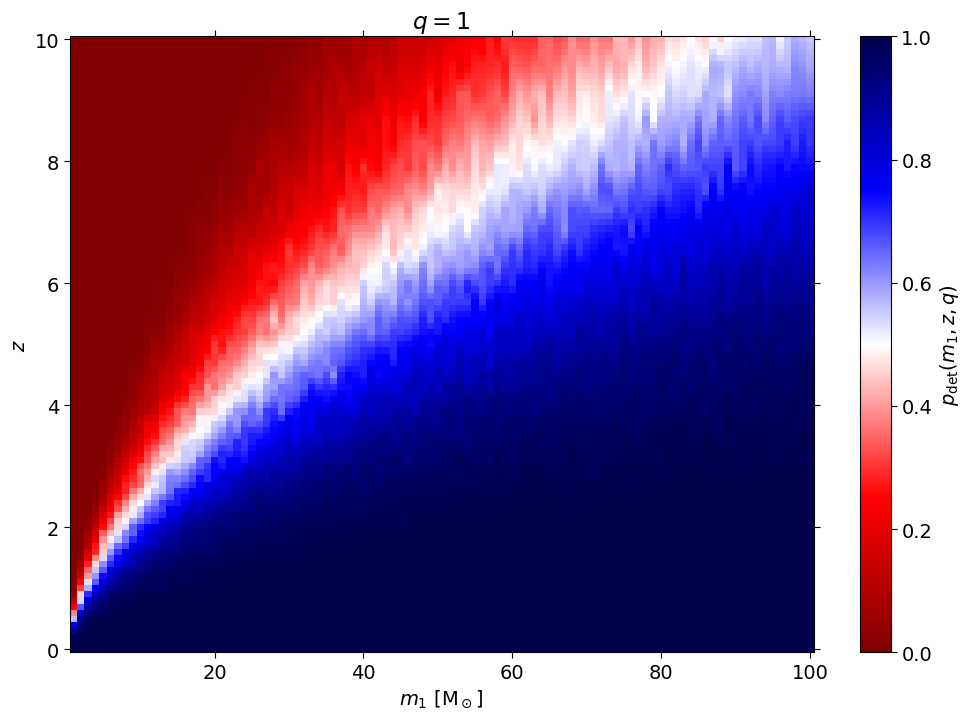

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(rf'$q={q_list[q_index]}$')

ax.set_xlabel(rf'$m_1\ [{msun_lb}]$')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['seismic_r']
im = ax.pcolormesh(m1, z, p_det_qlist[q_index], cmap=cmap, vmin=0, vmax=1)

fig.colorbar(im, ax=ax, label=rf'${pdet_lb}(m_1, z, q)$')

plt.show()

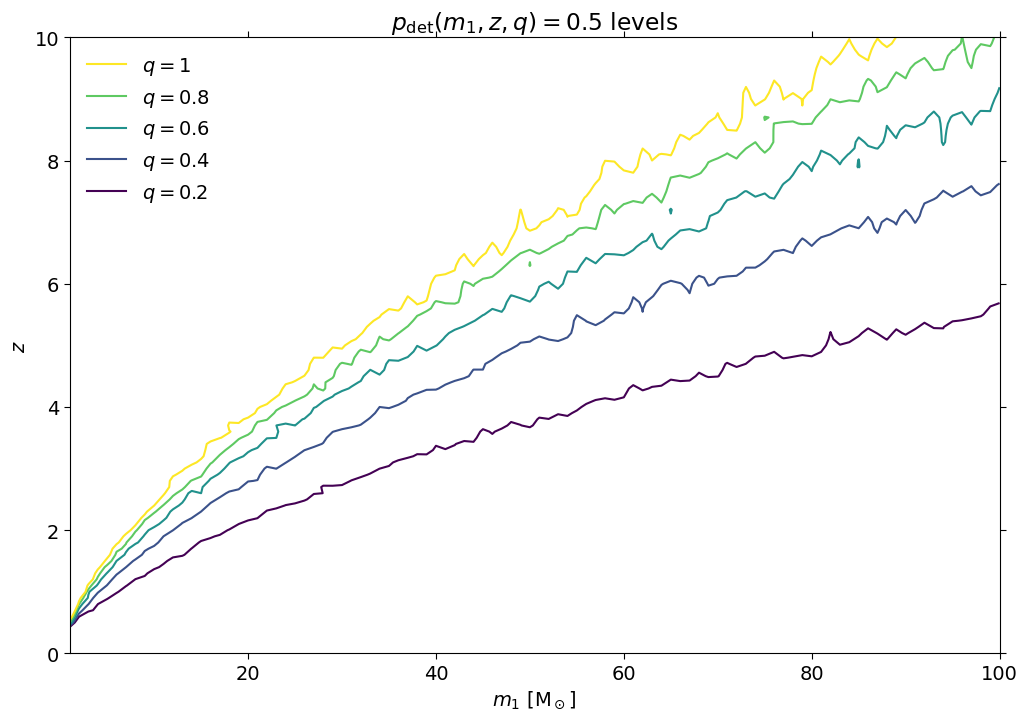

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(rf'${pdet_lb}(m_1, z, q) = 0.5$ levels')

ax.set_xlabel(rf'$m_1\ [{msun_lb}]$')
ax.set_ylabel(r'$z$')

lines = []
for q, p_det, c in zip(q_list, p_det_qlist, plt.colormaps['viridis'](np.linspace(0, 1, len(q_list)))):
    cf = ax.contour(m1, z, p_det, levels=[0.5], colors=c)
    lines.append(ax.plot([], [], color=c, label=rf'$q = {q}$')[0]) # Proxy for legend

ax.legend(handles=lines, loc='upper left', reverse=True)

plt.show()

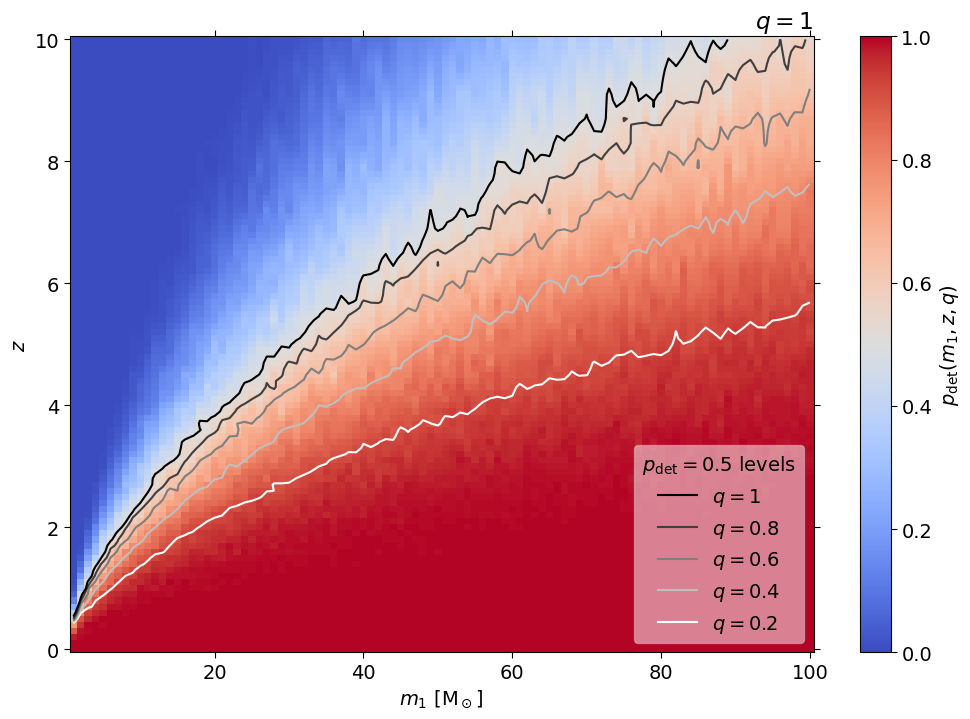

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(rf'$q = {q_list[q_index]}$', loc='right')

ax.set_xlabel(rf'$m_1\ [{msun_lb}]$')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['coolwarm']
im = ax.pcolormesh(m1, z, p_det_qlist[q_index], cmap=cmap, vmin=0, vmax=1)

fig.colorbar(im, ax=ax, label=rf'${pdet_lb}(m_1, z, q)$')

lines = []
for q, p_det, c in zip(q_list, p_det_qlist, plt.colormaps['binary'](np.linspace(0, 1, len(q_list)))):
    cf = ax.contour(m1, z, p_det, levels=[0.5], colors=c)
    lines.append(ax.plot([], [], color=c, label=rf'$q = {q}$')[0]) # Proxy for legend

ax.legend(handles=lines, loc='lower right',
          reverse=True, frameon=True,
          title=rf'${pdet_lb} = 0.5$ levels')

figures.append(fig)
figure_paths.append(os.path.join(image_path, "pdet_map"))

plt.show()

In [10]:
if __name__ == '__main__':
    VT = VT_pop_uniform_q(Tobs, z, m1, q_list[q_index])

Computing VT for each (m, z) pair for a uniformly distributed population of sources with fixed q = 1: 100%|██████████| 9900/9900 [02:12<00:00, 75.00it/s] 


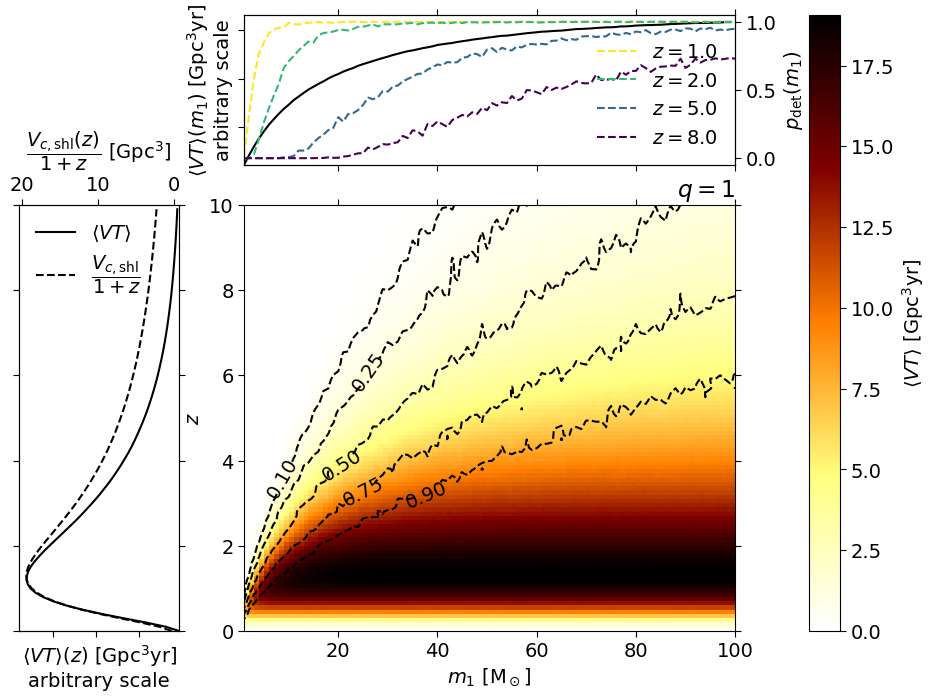

In [11]:
VT_plot = VT / 1e9 # Gpc^3 yr

fig, ax = plt.subplots(figsize=(12, 8))

divider = make_axes_locatable(ax)

ax_top = divider.append_axes('top', 1.5, pad=0.4, sharex=ax)
ax_left = divider.append_axes('left', 1.6, pad=0.65, sharey=ax)

ax_top.tick_params(labelbottom=False, labelleft=False, left=False, right=False)
ax_left.tick_params(labelbottom=False, labelleft=False, bottom=False, top=False)

ax.set_title(rf'$q = {q_list[q_index]}$', loc='right')

ax.set_xlabel(rf'$m_1\ [{msun_lb}]$')
ax.set_ylabel(r'$z$')
ax_top.set_ylabel(rf'${VT_lb}(m_1)\ [{Gpc_lb}^3{yr_lb}]$' + '\narbitrary scale')
ax_left.set_xlabel(rf'${VT_lb}(z)\ [{Gpc_lb}^3{yr_lb}]$' + '\narbitrary scale')

cmap = plt.colormaps['afmhot_r']
im = ax.pcolormesh(m1, z, VT_plot, cmap=cmap, vmin=np.min(VT_plot), vmax=np.max(VT_plot))

levels = [0.1, 0.25, 0.5, 0.75, 0.9]
cf = ax.contour(m1, z, p_det_qlist[-1], levels=levels, linestyles='--', colors='black')
ax.clabel(cf)

cbar = fig.colorbar(im, ax=ax, label=rf'${VT_lb}\ [{Gpc_lb}^3{yr_lb}]$', pad=0.08)

ax_top.plot(m1[:-1], np.sum(VT_plot, axis=0), color='black')
top_lims = ax_top.get_ylim()
ax_top.autoscale(axis='y', tight=True)
ax_top.set_ylim(top=top_lims[-1])

ax_top_2 = ax_top.twinx()
ax_top_2.set_ylabel(rf'${pdet_lb}(m_1)$')

indexes = [z == val for val in [1, 2, 5, 8]]
for i, mask in enumerate(indexes):
    indexes[i] = np.argwhere(mask)[0][0]
for index, c in zip(indexes, plt.colormaps['viridis_r'](np.linspace(0, 1, len(indexes)))):
    ax_top_2.plot(m1, p_det_qlist[q_index][index], color=c, linestyle='--', label=rf'$z = {z[index]}$')

ax_top_2.legend(loc='lower right')

lines_left = []

lines_left.append(ax_left.plot(np.sum(VT_plot, axis=1), z[:-1], color='black', label=rf'${VT_lb}$')[0])
ax_left.xaxis.set_inverted(True)
left_lims = ax_left.get_xlim()
ax_left.autoscale(axis='x', tight=True)
ax_left.set_xlim(left=left_lims[0])

cosmology_factor = (Planck18.comoving_volume(z[1:]) - Planck18.comoving_volume(z[:-1])).to(u.Gpc ** 3).to_value() / (1 + z[:-1])
ax_left_2 = ax_left.twiny()
ax_left_2.set_xlabel(rf'$\dfrac{{V_{{c,\text{{shl}}}}(z)}}{{1+z}}\ [{Gpc_lb}^3]$', labelpad=12)

lines_left.append(ax_left_2.plot(cosmology_factor, z[:-1], color='black', linestyle='--', label=r'$\dfrac{V_{c,\text{shl}}}{1+z}$')[0])
ax_left_2.xaxis.set_inverted(True)
ax_left_2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))

ax_left.legend(handles=lines_left, loc='upper left')

plt.show()

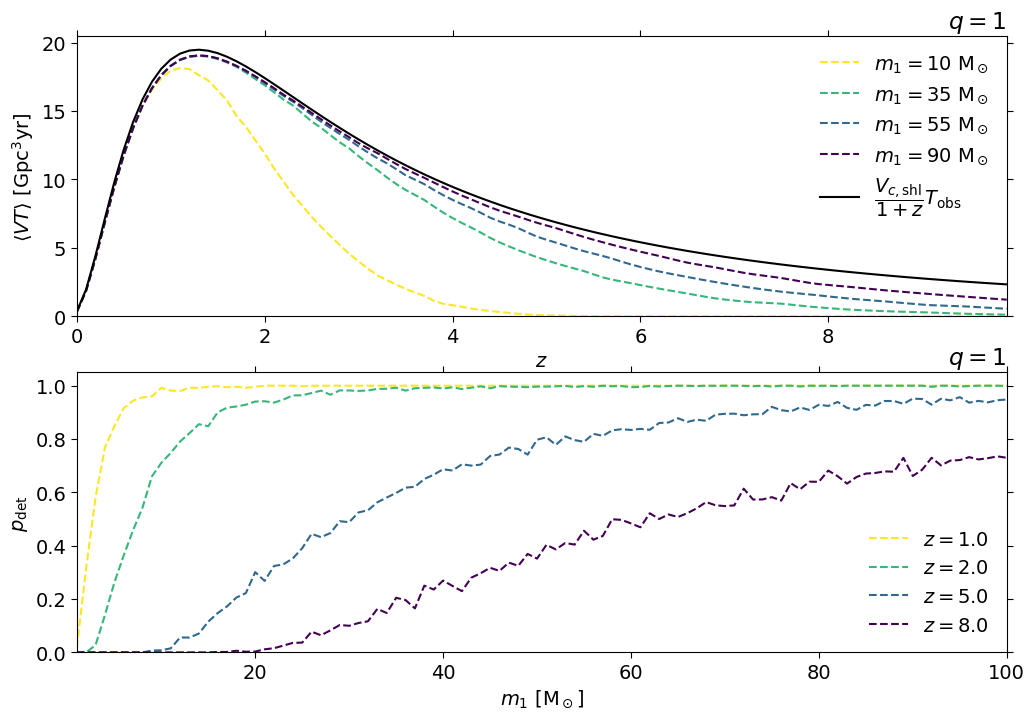

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

for ax in axes:
    ax.set_title(rf'$q = {q_list[q_index]}$', loc='right')

axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel(rf'${VT_lb}\ [{Gpc_lb}^3{yr_lb}]$')

axes[1].set_xlabel(rf'$m_1\ [{msun_lb}]$')
axes[1].set_ylabel(rf'${pdet_lb}$')

indexes = [m1 == val for val in [10, 35, 55, 90]]
for i, mask in enumerate(indexes):
    indexes[i] = np.argwhere(mask)[0][0]
for index, c in zip(indexes, plt.colormaps['viridis_r'](np.linspace(0, 1, len(indexes)))):
    axes[0].plot(z[:-1], VT_plot[:, index], color=c, linestyle='--', label=rf'$m_1 = {m1[index]}\ {msun_lb}$')

cosmology_factor = Tobs * (Planck18.comoving_volume(z[1:]) - Planck18.comoving_volume(z[:-1])).to(u.Gpc ** 3).to_value() / (1 + z[:-1])
axes[0].plot(z[:-1], cosmology_factor, color='black', label=rf'$\dfrac{{{Vcshell_lb}}}{{1+z}} {Tobs_lb}$')

ylims = axes[0].get_ylim()
axes[0].autoscale(axis='both', tight=True)
axes[0].set_ylim(top=ylims[-1])

axes[0].legend(loc='upper right')

indexes = [z == val for val in [1, 2, 5, 8]]
for i, mask in enumerate(indexes):
    indexes[i] = np.argwhere(mask)[0][0]
for index, c in zip(indexes, plt.colormaps['viridis_r'](np.linspace(0, 1, len(indexes)))):
    axes[1].plot(m1, p_det_qlist[q_index][index], color=c, linestyle='--', label=rf'$z = {z[index]}$')

ylims = axes[1].get_ylim()
axes[1].autoscale(axis='both', tight=True)
axes[1].set_ylim(top=ylims[-1])

axes[1].legend(loc='lower right')

figures.append(fig)
figure_paths.append(os.path.join(image_path, "pdet_and_VT_trends"))

plt.show()

In [13]:
m_keys = ("low", "high")

mc = {key: val for key, val in zip(m_keys, (10, 35))}
mw = {key: val for key, val in zip(m_keys, (5, 5))}
q = {key: val for key, val in zip(m_keys, (0.8, 1))}
zw = {key: val for key, val in zip(m_keys, (0.1, 0.1))}
T_obs = {key: val for key, val in zip(m_keys, (Tobs, Tobs))}

zinf_axis = {key: np.arange(zinf_min, zinf_max, zw[key]) for key, zinf_min, zinf_max in zip(m_keys, (0, 0), (6, 6))}

bins_axis = {key: [MZQbin(mc[key] - mw[key] / 2,
                          mc[key] + mw[key] / 2,
                          zinf,
                          zinf + zw[key],
                          q[key]) for zinf in zinf_axis[key]] for key in m_keys}

In [14]:
if __name__ == '__main__':
    for key in m_keys:
        bin_initializer(bins_axis[key], T_obs[key])

Initilizing bins: computing VT: 100%|██████████| 60/60 [00:25<00:00,  2.34it/s]


In [15]:
N1_N2_axis_res = 0.02
N1_N2_axis = {key: np.arange(val_min, val_max, N1_N2_axis_res) for key, val_min, val_max in zip(m_keys, (0.01, 0.01), (10, 10))}

zref = {key: val for key, val in zip(m_keys, (0.25, 0.25))} # Reference redshift (inferior limit of reference redshift bin)
N2_ref = {key: val for key, val in zip(m_keys, (10, 10))}
bin2_ref = {key: MZQbin(mc[key] - mw[key] / 2, mc[key] + mw[key] / 2, zref[key], zref[key] + zw[key], q[key]) for key in m_keys}

cl = 0.95

for key in m_keys:
    bin2_ref[key].VTmc(T_obs[key])

In [16]:
R1_R2_CI_map = {key: RateRatioBayesCI_map(cl, bin2_ref[key], N1_N2_axis[key], bins_axis[key], N2_ref[key], T_obs[key]) for key in m_keys}

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 10256 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 11248 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:    4.3s finished


In [17]:
R1_R2_CI_array = {key: np.zeros((len(N1_N2_axis[key]), len(bins_axis[key]), 3)) for key in m_keys}
R1_R2_a_array = {key: np.zeros((len(N1_N2_axis[key]), len(bins_axis[key]))) for key in m_keys}

R1_R2_ref = 1
# 1 if R1_R2_ref is inside confidence interval
Det_map_R1_R2 = {key: None for key in m_keys}

R1_R2_ref_list = [0.5, 1, 2, 3, 5, 10]
# Linked to R1_R2_ref_list on the first dimension. True if the corresponding R1_R2 value is inside the confidence interval
R1_R2_CI_list_mask = {key: np.zeros((len(R1_R2_ref_list), len(N1_N2_axis[key]), len(bins_axis[key])), dtype=bool) for key in m_keys}
Det_map_R1_R2_list = {key: [None for R1_R2 in R1_R2_ref_list] for key in m_keys}


# Fill the arrays
for key in m_keys:
    for i, _ in enumerate(N1_N2_axis[key]):
        for j, _ in enumerate(bins_axis[key]):
            R1_R2_CI_array[key][i, j] = np.copy(R1_R2_CI_map[key][i][j][0])
            R1_R2_a_array[key][i, j] = R1_R2_CI_map[key][i][j][2] # a = bin2_ref.VT / bin.VT
    
    for i, R1_R2 in enumerate(R1_R2_ref_list):
        R1_R2_CI_list_mask[key][i] = (R1_R2_CI_array[key][:, :, 0] <= R1_R2) & (R1_R2 <= R1_R2_CI_array[key][:, :, 2])

    Det_map_R1_R2[key] = ((R1_R2_CI_array[key][:, :, 0] <= R1_R2_ref) & (R1_R2_ref <= R1_R2_CI_array[key][:, :, 2])).astype(int)

    for i, R1_R2 in enumerate(R1_R2_ref_list):
        Det_map_R1_R2_list[key][i] = ((R1_R2_CI_array[key][:, :, 0] <= R1_R2) & (R1_R2 <= R1_R2_CI_array[key][:, :, 2]))
        Det_map_R1_R2_list[key][i] = np.ma.masked_array(Det_map_R1_R2_list[key][i], ~Det_map_R1_R2_list[key][i]).astype(int)

# For each value in R1_R2_ref_list, select the N1_N2 vs z curves that represents the associated confidence interval
inf_lvl_alpha = {key: np.zeros((len(R1_R2_ref_list), len(bins_axis[key]))) for key in m_keys}
sup_lvl_alpha = {key: np.zeros((len(R1_R2_ref_list), len(bins_axis[key]))) for key in m_keys}

for key in m_keys:
    for i in range(len(R1_R2_ref_list)):
        for j in range(len(bins_axis[key])):
            True_indexes = np.where(R1_R2_CI_list_mask[key][i, :, j])[0]
            if len(True_indexes) != 0:
                inf_lvl_alpha[key][i, j] = N1_N2_axis[key][True_indexes[0]]
                sup_lvl_alpha[key][i, j] = N1_N2_axis[key][True_indexes[-1]]

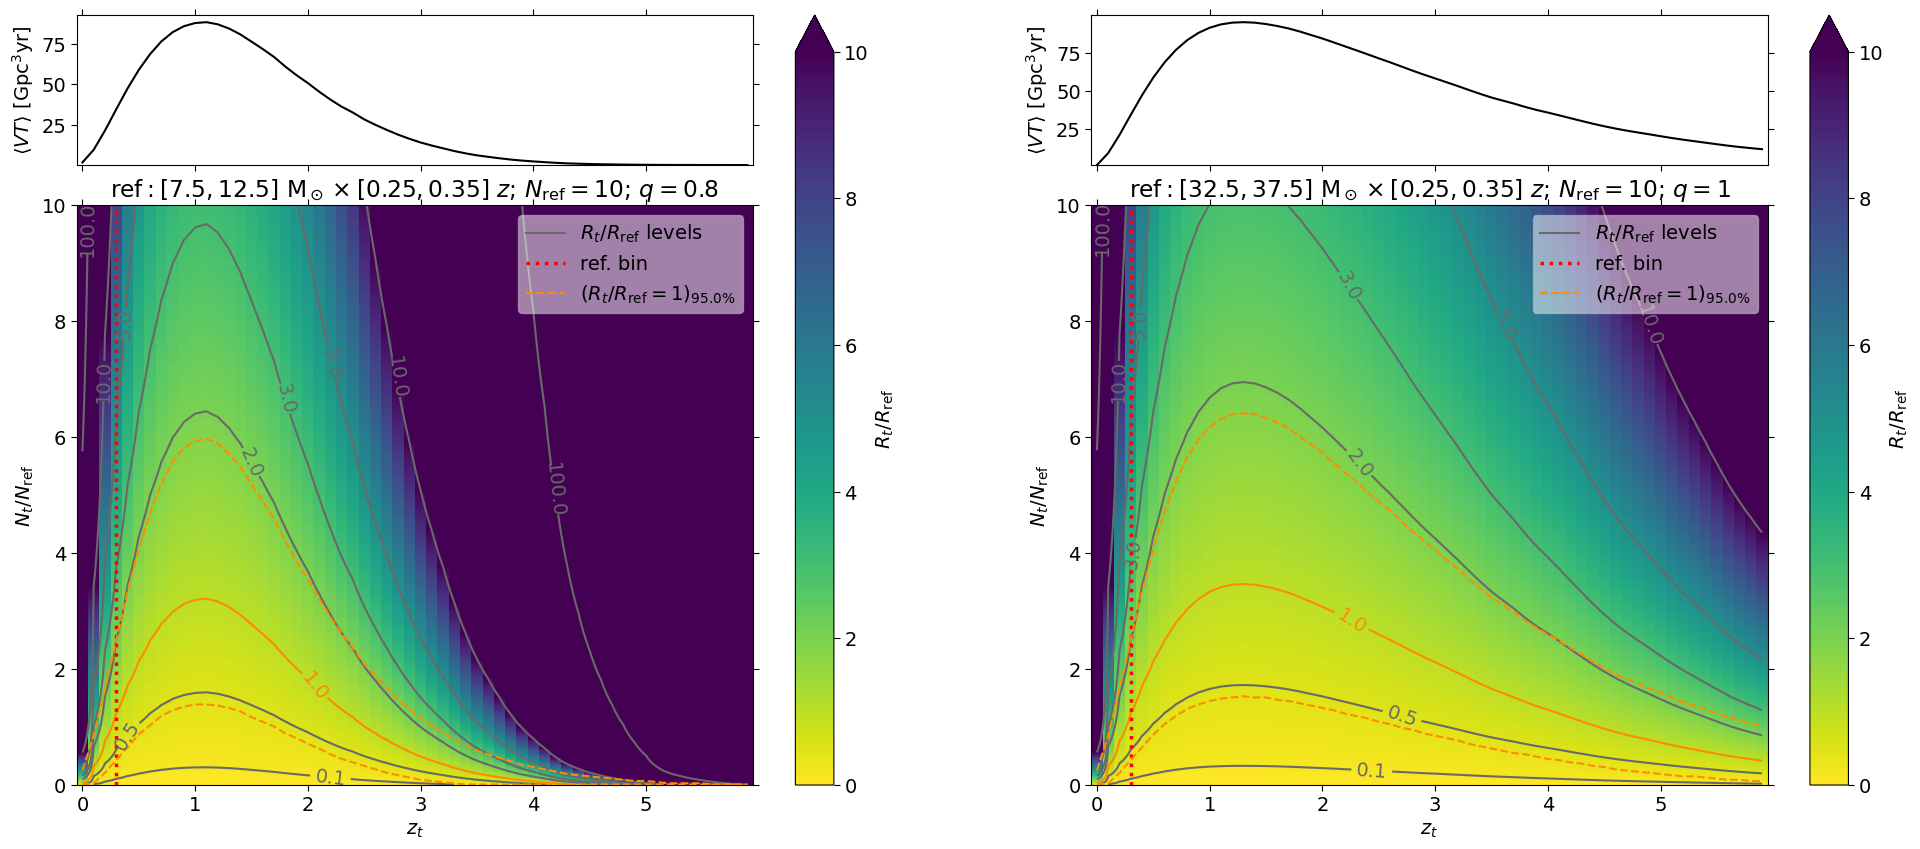

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for ax, key in zip(axes, m_keys):
    data_plot = np.copy(R1_R2_CI_array[key])
    data_plot[np.isinf(data_plot)] = 1e9 # Map infinite values to high numbers to avoid empty regions in the plot

    divider = make_axes_locatable(ax)

    ax_top = divider.append_axes('top', 1.5, pad=0.4, sharex=ax)
    ax_top.tick_params(labelbottom=False)
    
    ax.set_title(rf'$\text{{ref}}: [{bin2_ref[key].minf}, {bin2_ref[key].msup}]\ {msun_lb} \times [{bin2_ref[key].zinf}, {bin2_ref[key].zsup}]\ z$;' +
                 rf' ${Nref_lb} = {N2_ref[key]}$; $q = {q[key]}$')

    ax.set_xlabel(rf'${zt_lb}$')
    ax.set_ylabel(rf'${Nratio_lb}$')
    ax_top.set_ylabel(rf'${VT_lb}\ [{Gpc_lb}^3{yr_lb}]$')

    # R1/R2 color map
    cmap = plt.colormaps['viridis_r']
    im = ax.pcolormesh(zinf_axis[key], N1_N2_axis[key], data_plot[:, :, 1],
                       cmap=cmap, vmin=0, vmax=10)
    fig.colorbar(im, ax=ax, label=rf'${Rratio_lb}$', extend='max')

    lines = []
    # R1/R2 Contour levels
    levels = list(dict.fromkeys(sorted([0.1, 0.5, 1, 2, 3, 5, 10, 100, R1_R2_ref])))
    lvl_color, ref_lvl_color = 'dimgray', 'darkorange'
    colors = [lvl_color] * len(levels)
    colors[levels.index(R1_R2_ref)] = ref_lvl_color
    cf = ax.contour(zinf_axis[key], N1_N2_axis[key], data_plot[:, :, 1],
                    levels=levels, colors=colors)
    lines.append(ax.plot([], [], color=lvl_color, label=rf'${Rratio_lb}$ levels')[0]) # Proxy for legend
    ax.clabel(cf)

    # Reference line for the reference bin
    lines.append(ax.axvline((bin2_ref[key].zinf + bin2_ref[key].zsup) / 2,
                            color='red', linestyle=':', linewidth=2.5, label='ref. bin'))

    # Plot the confidence interval for R2/R2 = 1
    for i, boundary in enumerate([inf_lvl_alpha[key][R1_R2_ref_list.index(1)], sup_lvl_alpha[key][R1_R2_ref_list.index(1)]]):
        line = ax.plot(zinf_axis[key], boundary, linestyle='--', color=ref_lvl_color, label=rf'$({Rratio_lb} = {R1_R2_ref})_{{{cl * 100}\%}}$')[0]
        if i == 0:
            lines.append(line)

    ax.legend(handles=lines, frameon=True, loc='upper right')

    # Divide by 1e9 to convert to Gpc^3 yr
    ax_top.plot(zinf_axis[key], [bin.VT / 1e9 for bin in bins_axis[key]], color='black')

    ylims = ax_top.get_ylim()
    ax_top.autoscale(axis='both', tight=True)
    ax_top.set_ylim(top=ylims[-1])

figures.append(fig)
figure_paths.append(os.path.join(image_path, "Nratio_zt_map"))

plt.show()

In [19]:
N1_N2 = 1
R1_R2_CI_ZZmap = {key: RateRatioBayesCI_ZZmap(cl, N1_N2, bins_axis[key], bins_axis[key], N2_ref[key], T_obs[key]) for key in m_keys}

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    0.5s finished


In [20]:
if save_fig:
    for fig, path in zip(figures, figure_paths):
        fig.savefig(path, dpi=dpi, bbox_inches='tight')
    
    figures, figure_paths = [], []